In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
import os

In [97]:
def forecast_models(country):
    # Load the dataset
    file_path = f'country_dataset/{country}.csv'
    df = pd.read_csv(file_path)
    
    # Extract relevant columns
    X = df[['Year']]
    y = df['Total renewable water resources per capita (m3/inhab/year)']

    # Initialize models
    models = {
        'Linear Regression': LinearRegression(),
        'Decision Tree': DecisionTreeRegressor(random_state=123),
        'Random Forest': RandomForestRegressor(random_state=123),
        'XGBoost': xgb.XGBRegressor(random_state=123)
    }

    # Prepare future years DataFrame
    future_years = pd.DataFrame({
        'Year': [2022, 2023, 2024]
    })

    plt.figure(figsize=(14, 8))

    # Plot historical data
    plt.plot(X, y, label='Historical Data', marker='o')

    for name, model in models.items():
        model.fit(X, y)
        future_predictions = model.predict(future_years)
        
        # Plot model predictions
        plt.plot(future_years['Year'], future_predictions, label=f'{name} Predictions', marker='o', linestyle='--')

        # Optionally, evaluate the model
        y_train_pred = model.predict(X)
        mse = mean_squared_error(y, y_train_pred)
        print(f'{name} Mean Squared Error on training data: {mse:.2f}')

    # Time Series Forecast Model: ARIMA
    arima_model = ARIMA(y, order=(1, 1, 1))  # Adjust order as needed
    arima_fit = arima_model.fit()
    arima_forecast = arima_fit.predict(start=len(y), end=len(y) + len(future_years) - 1, typ='levels')

    # Plot ARIMA predictions
    plt.plot(future_years['Year'], arima_forecast, label='ARIMA Predictions', marker='o', linestyle='--', color='magenta')

    # Customize the plot
    plt.xlabel('Year')
    plt.ylabel('Renewable Water Resources (m3/inhab/year)')
    plt.title('Comparison of Forecasting Models for Renewable Water Resources')
    plt.legend()
    plt.grid(True)
    plt.show()


    for name, model in models.items():
        future_predictions = model.predict(future_years)
        
        print(f'{name} Predictions for 2022, 2023, 2024:')
        for year, pred in zip(future_years['Year'], future_predictions):
            print(f'  {year}: {pred:.2f} m3/inhab/year')
    
    # Print ARIMA predictions
    print('ARIMA Predictions for 2022, 2023, 2024:')
    for year, pred in zip(future_years['Year'], arima_forecast):
        print(f'  {year}: {pred:.2f} m3/inhab/year')



Linear Regression Mean Squared Error on training data: 1752.18
Decision Tree Mean Squared Error on training data: 0.00
Random Forest Mean Squared Error on training data: 6341.97
XGBoost Mean Squared Error on training data: 0.00


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


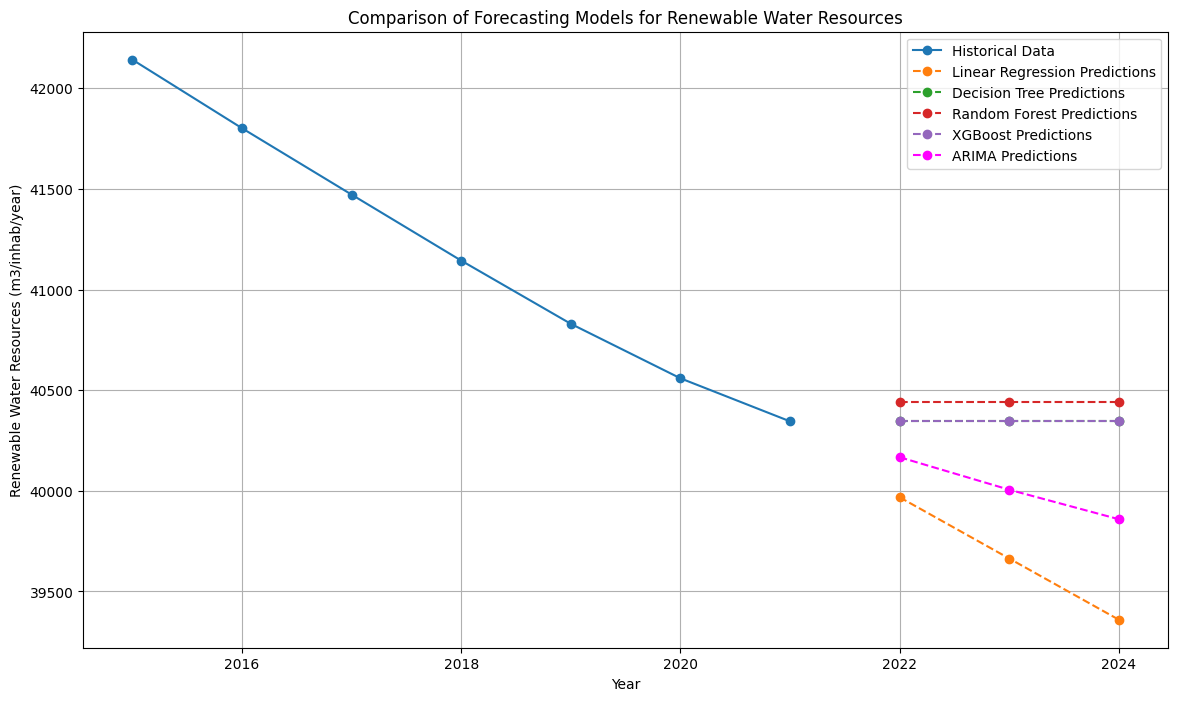

Linear Regression Predictions for 2022, 2023, 2024:
  2022: 39967.79 m3/inhab/year
  2023: 39663.61 m3/inhab/year
  2024: 39359.43 m3/inhab/year
Decision Tree Predictions for 2022, 2023, 2024:
  2022: 40345.04 m3/inhab/year
  2023: 40345.04 m3/inhab/year
  2024: 40345.04 m3/inhab/year
Random Forest Predictions for 2022, 2023, 2024:
  2022: 40440.83 m3/inhab/year
  2023: 40440.83 m3/inhab/year
  2024: 40440.83 m3/inhab/year
XGBoost Predictions for 2022, 2023, 2024:
  2022: 40345.05 m3/inhab/year
  2023: 40345.05 m3/inhab/year
  2024: 40345.05 m3/inhab/year
ARIMA Predictions for 2022, 2023, 2024:
  2022: 40166.90 m3/inhab/year
  2023: 40005.31 m3/inhab/year
  2024: 39858.75 m3/inhab/year


In [98]:
country = 'Brazil'
forecast_models(country)

In [99]:
def model(country):
    # Load the dataset
    file_path = f'dataset/{country}.csv'
    if not os.path.isfile(file_path):
        return 'Country not found'
    df = pd.read_csv(file_path)
    
    # Extract relevant columns
    X = df[['Year']]
    y = df['Total renewable water resources per capita (m3/inhab/year)']

    # Prepare future years DataFrame
    future_years = pd.DataFrame({
        'Year': [2022, 2023, 2024]
    })

    # Time Series Forecast Model: ARIMA
    arima_model = ARIMA(y, order=(1, 1, 1))  # Adjust order as needed
    arima_fit = arima_model.fit()
    arima_forecast = arima_fit.predict(start=len(y), end=len(y) + len(future_years) - 1, typ='levels')
    
    prediction_dict = {
        'Country': [country] * len(future_years),
        'Year': [year for year in future_years['Year']],
        'Total renewable water resources per capita (m3/inhab/year)': [pred for pred in arima_forecast]
    }

    # Write the predictions to a CSV file
    CSV_FILE_PATH = './COUNTRY.csv'
    prediction_df = pd.DataFrame(prediction_dict)

    # Append to the CSV file if it exists, otherwise create it
    if os.path.isfile(CSV_FILE_PATH):
        # Append mode with header only if file is empty
        prediction_df.to_csv(CSV_FILE_PATH, mode='a', header=False, index=False)
    else:
        # Create file and write header
        prediction_df.to_csv(CSV_FILE_PATH, mode='w', header=True, index=False)

    
    return pd.DataFrame(prediction_dict)


In [100]:
# Read the csv file
df = pd.read_csv('./new_dataset.csv')
# Get the unique countries
countries = df['Country'].unique()
for country in countries:
    model(country)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_ke